In [9]:
from pygrackle import \
 FluidContainer, \
 chemistry_data, \
 evolve_constant_density

from pygrackle.utilities.physical_constants import \
 mass_hydrogen_cgs, \
 sec_per_Myr, \
 cm_per_mpc

import dengo
from dengo.chemical_network import \
 ChemicalNetwork, \
 reaction_registry, \
 cooling_registry, species_registry
import dengo.primordial_rates
import dengo.primordial_cooling

ImportError: libgrackle-3.2.dev2.so: cannot open shared object file: No such file or directory

In [6]:
import os
os.environ['LD_LIBRARY_PATH'] = "/home/kwoksun2/grackle_install/lib:{os.environ['LD_LIBRARY_PATH']}"

In [8]:
!ls /home/kwoksun2/grackle_install/lib

libgrackle-3.1.so	libgrackle.a   libgrackle.so
libgrackle-3.2.dev2.so	libgrackle.la


# Comparing with PyGrackle

In [67]:
def run_grackle(init_dict, dt):
    current_redshift = 0.

    # Set solver parameters
    my_chemistry = chemistry_data()
    my_chemistry.use_grackle = 1
    my_chemistry.with_radiative_cooling = 1
    my_chemistry.primordial_chemistry = 2
    my_chemistry.metal_cooling = 0
    my_chemistry.UVbackground = 0
    my_chemistry.self_shielding_method = 0
    my_chemistry.H2_self_shielding = 0
    my_chemistry.three_body_rate = 4
    
    grackle_data_file = bytearray("/home/kwoksun2/grackle/input/CloudyData_UVB=HM2012.h5", 'utf-8')
    my_chemistry.grackle_data_file = grackle_data_file

    # Set units
    my_chemistry.comoving_coordinates = 0 # proper units
    my_chemistry.a_units = 1.0
    my_chemistry.a_value = 1. / (1. + current_redshift) / \
     my_chemistry.a_units
    my_chemistry.density_units = 1.0 # rho = 1.0 is 1.67e-24 g
    my_chemistry.length_units = 1.0         # 1 Mpc in cm
    my_chemistry.time_units = 1.0          # 1 Myr in s
    my_chemistry.velocity_units = my_chemistry.a_units * \
     (my_chemistry.length_units / my_chemistry.a_value) / \
     my_chemistry.time_units

    rval = my_chemistry.initialize()
    
    element_map = {}
    element_map['H_1'] = "HI"
    element_map['H_2'] = "HII"
    element_map['H2_1'] = "H2I"
    element_map['H2_2'] = "H2II"
    element_map['H_m0'] = "HM"
    element_map['He_1'] = "HeI"
    element_map['He_2'] = "HeII"
    element_map['He_3'] = "HeIII"
    element_map["de"]   = "de"
    element_map['density'] = 'density'
    
    fc = FluidContainer(my_chemistry, 1)
    for k, v in init_dict.items():
        if k in element_map:
            fc[element_map[k]][:] = v*1.67e-24
    fc['energy'][:] = init_dict['ge']
    
    print(fc)
    
    safety_factor = 0.01
    data = evolve_constant_density(fc, final_time = dt, safety_factor=0.01)
    return fc, data

In [6]:
def setup_primordial_network():
    """Initial a ChemicalNetwork object
    for primordial network 9-species model
    Return:
     primordial: ChemicalNetwork with primordial reactions and cooling
    """
    # this register all the rates specified in `primordial_rates.py`
    dengo.primordial_rates.setup_primordial()

    # initialize the chmical network object
    primordial = ChemicalNetwork()

    # add all the reactions
    primordial.add_reaction("k01")
    primordial.add_reaction("k02")
    primordial.add_reaction("k03")
    primordial.add_reaction("k04")
    primordial.add_reaction("k05")
    primordial.add_reaction("k06")
    primordial.add_reaction("k07")
    primordial.add_reaction("k08")
    primordial.add_reaction("k09")
    primordial.add_reaction("k10")
    primordial.add_reaction("k11")
    primordial.add_reaction("k12")
    primordial.add_reaction("k13")
    primordial.add_reaction("k14")
    primordial.add_reaction("k15")
    primordial.add_reaction("k16")
    primordial.add_reaction("k17")
    primordial.add_reaction("k18")
    primordial.add_reaction("k19")
    primordial.add_reaction("k21")
    primordial.add_reaction("k22")
    primordial.add_reaction("k23")

    primordial.add_cooling("brem")
    primordial.add_cooling("reHII")
    primordial.add_cooling("reHeIII")
    primordial.add_cooling("gloverabel08")
    primordial.add_cooling("ceHI")
    primordial.add_cooling("h2formation")
    primordial.add_cooling("h2formation_extra")
    primordial.add_cooling("reHeII2")
    primordial.add_cooling("reHeII1")
    primordial.add_cooling("ciHeIS")
    primordial.add_cooling("ceHeII")
    primordial.add_cooling("ciHI")
    primordial.add_cooling("ceHeI")
    primordial.add_cooling("gammah")
    primordial.add_cooling("ciHeI")
    primordial.add_cooling("ciHeII")
    primordial.add_cooling("cie_cooling")
    primordial.add_cooling("compton")

    # This defines the temperature range for the rate tables
    primordial.init_temperature((1e0, 1e8))

    #primordial.enforce_conservation = True
    #primordial.set_equilibrium_species("H2_2")

    return primordial

In [7]:
dengo_network = setup_primordial_network()

Adding reaction: k01 : 1*H_1 + 1*de => 1*H_2 + 2*de
Adding reaction: k02 : 1*H_2 + 1*de => 1*H_1
Adding reaction: k03 : 1*He_1 + 1*de => 1*He_2 + 2*de
Adding reaction: k04 : 1*He_2 + 1*de => 1*He_1
Adding reaction: k05 : 1*He_2 + 1*de => 1*He_3 + 2*de
Adding reaction: k06 : 1*He_3 + 1*de => 1*He_2
Adding reaction: k07 : 1*H_1 + 1*de => 1*H_m0
Adding reaction: k08 : 1*H_m0 + 1*H_1 => 1*H2_1 + 1*de
Adding reaction: k09 : 1*H_1 + 1*H_2 => 1*H2_2
Adding reaction: k10 : 1*H2_2 + 1*H_1 => 1*H2_1 + 1*H_2
Adding reaction: k11 : 1*H2_1 + 1*H_2 => 1*H2_2 + 1*H_1
Adding reaction: k12 : 1*H2_1 + 1*de => 2*H_1 + 1*de
Adding reaction: k13 : 1*H2_1 + 1*H_1 => 3*H_1
Adding reaction: k14 : 1*H_m0 + 1*de => 1*H_1 + 2*de
Adding reaction: k15 : 1*H_m0 + 1*H_1 => 2*H_1 + 1*de
Adding reaction: k16 : 1*H_m0 + 1*H_2 => 2*H_1
Adding reaction: k17 : 1*H_m0 + 1*H_2 => 1*H2_2 + 1*de
Adding reaction: k18 : 1*H2_2 + 1*de => 2*H_1
Adding reaction: k19 : 1*H2_2 + 1*H_m0 => 1*H_1 + 1*H2_1
Adding reaction: k21 : 2*H_1 

In [8]:
import numpy as np
kboltz = 1.38e-16


tiny = 1e-20
def setup_initial_conditions(network, density, temperature, h2frac, NCELLS):
    # setting initial conditions
    temperature = np.ones((NCELLS))*temperature
    init_array = np.ones(NCELLS) * density
    init_values = dict()
    init_values["H_1"] = (init_array * 0.76) / (1+h2frac)
    init_values['H_2'] = init_array * tiny
    init_values['H_m0'] = init_array * tiny
    init_values['He_1'] = init_array * 0.24
    init_values['He_2'] = init_array * tiny
    init_values['He_3'] = init_array * tiny
    init_values['H2_1'] = init_array * 0.76 * h2frac / (1+h2frac)
    init_values['H2_2'] = init_array * tiny
    init_values['de'] = init_array * tiny

    # update and calculate electron density and etc with the handy functions
    # init_values = primordial.convert_to_mass_density(init_values)
    init_values['de'] = network.calculate_free_electrons(init_values)
    # init_values['density'] = primordial.calculate_total_density(init_values)
    init_values['density'] = np.ones((NCELLS))*density
    number_density = network.calculate_number_density(init_values)

    # set up initial temperatures values used to define ge
    init_values['T'] = temperature

    # calculate ge (very crudely, no H2 help here)
    gamma = 5.0/3.0
    mH = 1.67e-24
    init_values["ge"] = 3.0 / 2.0 * temperature * kboltz / mH

    return init_values

In [43]:
import yt
density = 1e0
temperature = 1000.0
h2frac      = 1e-3

dtf = 1e-1 / (yt.units.G * yt.units.mh / yt.units.cm**3 * density)**0.5
init_values = setup_initial_conditions(dengo_network, density, temperature, h2frac, 1)

In [44]:
import os
fc, out = run_grackle(init_values, dtf)

{'density': array([1.67e-24]), 'metal': array([0.]), 'dust': array([0.]), 'HI': array([1.26793207e-24]), 'HII': array([1.67e-44]), 'HeI': array([4.008e-25]), 'HeII': array([1.67e-44]), 'HeIII': array([1.67e-44]), 'de': array([2.08668578e-44]), 'H2I': array([1.26793207e-27]), 'H2II': array([1.67e-44]), 'HM': array([1.67e-44]), 'H2_self_shielding_length': array([0.]), 'energy': array([1.23952096e+11]), 'x-velocity': array([0.]), 'y-velocity': array([0.]), 'z-velocity': array([0.]), 'temperature': array([0.]), 'dust_temperature': array([0.]), 'pressure': array([0.]), 'gamma': array([0.]), 'cooling_time': array([0.]), 'mu': array([0.]), 'nH': array([0.]), 'mean_molecular_weight': array([0.])}
Evolve constant density - t: 0.000000e+00 yr, rho: 1.670000e-24 g/cm^3, T: 1.221040e+03 K.
Evolve constant density - t: 1.024199e+05 yr, rho: 1.670000e-24 g/cm^3, T: 7.247171e+08 K.
Evolve constant density - t: 2.048398e+05 yr, rho: 1.670000e-24 g/cm^3, T: 1.449279e+09 K.
Evolve constant density - t: 

In [82]:
# compile a BE chem solve one
import pyximport
import os
import numpy as np

solver_name = "test_grackle"
output_dir  = '.'
network = dengo_network

# specify the library path
os.environ["HDF5_DIR"] = "/home/kwoksun2/anaconda3"
os.environ["CVODE_PATH"] = "/home/kwoksun2/dengo-merge/cvode-3.1.0/instdir"
os.environ["HDF5_PATH"]  = "/home/kwoksun2/anaconda3"
os.environ["SUITESPARSE_PATH"] = "/home/kwoksun2/dengo-merge/suitesparse"
os.environ["DENGO_INSTALL_PATH"] = "/home/kwoksun2/dengo_install"

# install the library
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True, inplace=True)

network.write_solver(solver_name, output_dir=output_dir,
                solver_template="cv_omp/sundials_CVDls",
                ode_solver_source="initialize_cvode_solver.C")
simple_solver_run = pyximport.load_module(
    "{}_solver_run".format(solver_name),
    "{}_solver_run.pyx".format(solver_name),
    build_inplace=True, pyxbuild_dir="_dengo_temp")

You have suitesparse!


/home/kwoksun2/anaconda3/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/kwoksun2/dengo-merge/cookbook/test_grackle_solver_run.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)


In [81]:
init_values

{'H_1': array([75999999.24000001]),
 'H_2': array([1.e-12]),
 'H_m0': array([1.e-12]),
 'He_1': array([24000000.]),
 'He_2': array([1.e-12]),
 'He_3': array([1.e-12]),
 'H2_1': array([0.75999999]),
 'H2_2': array([1.e-12]),
 'de': array([1.24951244e-12]),
 'density': array([1.e+08]),
 'T': array([1000.]),
 'ge': array([1.23952096e+11])}

In [83]:
density = 1e8
temperature = 1000.0
h2frac      = 1e-8

dtf = 1e-1 / (yt.units.G * yt.units.mh / yt.units.cm**3 * density)**0.5
init_values = setup_initial_conditions(dengo_network, density, temperature, h2frac, 1)
_, out_dengo       = simple_solver_run.run_test_grackle(init_values,dtf)

init_values = setup_initial_conditions(dengo_network, density, temperature, h2frac, 1)
fc, out_grackle = run_grackle(init_values, dtf)

Successful iteration[    0]: (2.992e+06) 2.992e+06 / 2.992e+10
End in 73 iterations: 2.99205e+10 / 2.99205e+10 (0.00000e+00)
{'density': array([1.67e-16]), 'metal': array([0.]), 'dust': array([0.]), 'HI': array([1.26919999e-16]), 'HII': array([1.67e-36]), 'HeI': array([4.008e-17]), 'HeII': array([1.67e-36]), 'HeIII': array([1.67e-36]), 'de': array([2.08668578e-36]), 'H2I': array([1.26919999e-24]), 'H2II': array([1.67e-36]), 'HM': array([1.67e-36]), 'H2_self_shielding_length': array([0.]), 'energy': array([1.23952096e+11]), 'x-velocity': array([0.]), 'y-velocity': array([0.]), 'z-velocity': array([0.]), 'temperature': array([0.]), 'dust_temperature': array([0.]), 'pressure': array([0.]), 'gamma': array([0.]), 'cooling_time': array([0.]), 'mu': array([0.]), 'nH': array([0.]), 'mean_molecular_weight': array([0.])}
Evolve constant density - t: 0.000000e+00 yr, rho: 1.670000e-16 g/cm^3, T: 1.220851e+03 K.


In [84]:
import matplotlib.pyplot as plt

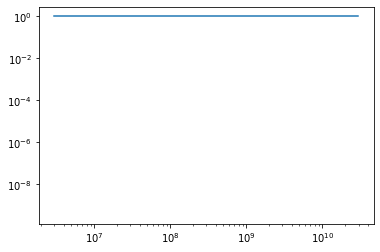

In [85]:
f = out_dengo['successful']
t = out_dengo['t'][f]
hI = out_dengo['H_1'][0][f]

totalH = out_dengo['H_1'][0][f] + out_dengo['H2_1'][0][f] 
totalH_g = out_grackle['HI'] + out_grackle['H2I']

plt.loglog(t, hI/ totalH)

t = out_grackle['time']
hi = out_grackle['HI']
plt.loglog(t, hi/ totalH_g)

In [86]:
out_grackle

defaultdict(list,
            {'density': YTArray([1.67e-16]) g/cm**3,
             'metal': YTArray([1.e-20]) g/cm**3,
             'dust': YTArray([0.]) g/cm**3,
             'HI': YTArray([4.78529163e-26]) g/cm**3,
             'HII': YTArray([1.36363068e-29]) g/cm**3,
             'HeI': YTArray([4.00775992e-17]) g/cm**3,
             'HeII': YTArray([7.51703104e-25]) g/cm**3,
             'HeIII': YTArray([7.51703104e-30]) g/cm**3,
             'de': YTArray([1.87936353e-25]) g/cm**3,
             'H2I': YTArray([1.269124e-16]) g/cm**3,
             'H2II': YTArray([1.36363068e-29]) g/cm**3,
             'HM': YTArray([1.36363068e-29]) g/cm**3,
             'energy': YTArray([1.06456603e+11]) erg/g,
             'temperature': YTArray([1058.34185608]) K,
             'pressure': YTArray([6.41887329e-06]) dyne/cm**2,
             'mu': array([2.01267205]),
             'time': YTArray([0.]) s})

In [62]:
totalH_g

YTArray([1.26912390e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16, 1.26912395e-16, 1.26912395e-16,
         1.26912395e-16, 1.26912395e-16]) g/cm**3

In [64]:
totalH*1.67e-24

array([1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26920000e-16, 1.26920000e-16, 1.26920000e-16,
       1.26920000e-16, 1.26919999e-16, 1.26919999e-16, 1.26919999e-16,
       1.26919999e-16, 1.26919999e-16, 1.26919999e-16, 1.26919999e-16,
       1.26919999e-16, 1.26919999e-16, 1.26919999e-16, 1.26919999e-16,
       1.26919998e-16, 1.26919998e-16, 1.26919998e-16, 1.26919998e-16,
      